#**Overview: Goals**
The goal of this project is to analyze consumer sentiment towards Beats by Dre products and gain valuable insights into how consumers perceive the brand. Through sentiment analysis and competitor comparison, we aim to identify key factors that influence consumer satisfaction and provide strategic recommendations for product and marketing improvements.

##Our Analysis will include:


* **Sentiment Analysis of Consumer Reviews**: Understanding overall consumer sentiment towards Beats Products.
* **Comparative Analysis**: Comparing consumer sentiment towards Beats By Dre with it's competitors.
* **AI-Generated Insights**: Utilizing AI (*Gemini* ) to uncover deeper insights in our data.
* **Strategic Recomendations:** Suggesting actionable strategies for product improvements and marketing.



#**Business Understanding:**
Our inital focus will be on understanding sentiment towards Beats By Dre products. With the growing market for audio products, consumer perception plays a critical role in shaping brand loyalty and driving sales.

In a competitive landscape where brands like Bose and Sony also dominate alongside Beats, it is esential for Beats By Dre to stay ahead by shaping its products offerings with consumer preferences in mind.

By analyzing sentiment, we can identify areas where Beats by Dre excels and areas where there is room for improvement. These insights can guide product development, marketing strategies, and customer engagement efforts.

#**Data Understanding:**
We will use over 5000+ Reviews scraped from Amazon focusing on Beats and Competitor products. These products cover all of Beats product line: Speakers, Headphones, and Earbuds. Competitors include bigger names such as Bose, Sony, and JBL while including smaller brands as well to cover the market.

Using tools such as Gemini AI to generate additional instights will provide us with more information.

The data will include text from consumer reviews, ratings, and product details. We will preprocess this data to ensure it is clean and ready for analysis. The key focus will be on understanding how sentiment varies across different aspects of the product, such as sound quality, design, and durability.

#**Step One: Prepare Data for Analysis and Import Libraries**


##Data Overview & Cleaning:


In [50]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import SpreadSheet from Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [51]:
# Load the Dataset
df = pd.read_csv('/content/drive/My Drive/reference_dataset_for_beats_externship.csv')
df.head()

,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black
1,1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red
2,2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red
3,3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black
4,4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black


In [52]:
# Index by Products for Comparisons
asins = [
    "B09PYVXXW5", "B09H27SXHS", "B09FM6PDHP", "B09HN594TL", "B096SV8SJG",
    "B0BTZKP1TP", "B08ZR5JB9G", "B0C2F5KD26", "B0BYPFNW6T", "B093SLWMS7",
    "B0CXL4FQBK", "B099TJGJ91", "B0D4SX9RC6", "B08X4YMTPM", "B0B44F1GGK",
    "B0BG93TZ5N", "B09XXW54QG", "B07DD3WBYW", "B07YBN9XXG", "B0CY6S748H",
    "B01IOD7KB6", "B0CVFM97GD", "B08NLCW9WY", "B08YRT9T38", "B08VL5S148",
    "B097XX34SL", "B07PXGQC1Q", "B0BZ9WMLNQ", "B0D3JB14QS", "B0BQPNMXQV",
    "B0C1QWWZR4", "B09CKF166Y", "B0CF7GYNW2", "B09CFP6J6D", "B0BZTCXG6T",
    "B0863H1JKB", "B09JL41N9C", "B09V9P5Q6W", "B0BZK2Z2TC", "B0C345M3T7",
    "B0CD2FSRDD", "B0CPFV77W4", "B0B1NGPY94", "B0BYSQDWRT", "B0B2SH4CN6",
    "B09D1HMBQ3", "B0D4STD5ZC", "B099TLMRB6", "B07GWRCZQP", "B09GK5JMHK",
    "B088KRKFJ3", "B08Z1RP9K8", "B0B445JCZ3", "B0B43Y8GHZ"
]

product_names = [
    "1MORE ComfoBuds Mini", "HTC Wireless Headphones", "JBL Tune 230NC TWS", "JLab Go Air Pop",
    "Beats Studio Buds", "Jabra Elite 4", "Sennheiser CX True Wireless", "Skullcandy Smokin' Buds",
    "Sony WF-C700N", "Soundcore Life P3", "Sony ULT Field 1", "Bose SoundLink Flex",
    "Beats Pill", "JBL CHARGE 5", "Sony SRS-XE200", "Tronsmart Bang SE", "Marshall Emberton II",
    "Ultimate Ears Boom 3", "Bose Soundlink Mini II", "Roam 2", "House of Marley Get Together",
    "Ultimate Ears MEGABOOM 4", "JBL Xtreme 3", "Bang & Olufsen Beosound Explore",
    "Bose SoundLink Revolve+ II", "Monster S320", "Apple AirPods 2nd Generation", "Google Pixel Buds A-Series",
    "JBL Vibe Beam", "JBL Tune Buds", "SAMSUNG Galaxy Buds2", "SAMSUNG Galaxy Buds FE", "Sony WF-C500",
    "Panasonic ErgoFit", "Panasonic True Wireless", "Beats Fit Pro", "JBL Live Pro TWS 2",
    "Beats Studio Buds +", "Sony WF-1000XM5", "Bose QuietComfort Ultra", "Bose Ultra Open Earbuds",
    "Google Pixel Buds Pro", "SHOKZ OpenFit", "SAMSUNG Galaxy Buds2 Pro", "Jabra Elite 7 Pro",
    "Beats Pill Pro", "Bose SoundLink Flex", "JBL Charge 4", "JBL Flip 6", "Marshall Stockwell II",
    "Sonos Roam", "Sony SRS-XE300", "Sony SRS-XG300"
]

product_dict = dict(zip(asins, product_names))
df.rename(columns={'Unnamed: 0': 'product_name'}, inplace=True)
df['product_name'] = df['product_id'].map(product_dict)
df.head()

,product_name,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,1MORE ComfoBuds Mini,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black
1,1MORE ComfoBuds Mini,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red
2,1MORE ComfoBuds Mini,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red
3,1MORE ComfoBuds Mini,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black
4,1MORE ComfoBuds Mini,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black


#**Step Two: Exploratory Data Analysis (EDA)**
**We will now take a look at some metrics of the dataset to further understand it.**

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_name        4843 non-null   object
 1   review_id           4945 non-null   object
 2   product_id          4945 non-null   object
 3   title               4945 non-null   object
 4   author              4944 non-null   object
 5   rating              4945 non-null   int64 
 6   content             4937 non-null   object
 7   timestamp           4945 non-null   object
 8   profile_id          4945 non-null   object
 9   is_verified         4945 non-null   int64 
 10  helpful_count       4945 non-null   int64 
 11  product_attributes  4721 non-null   object
dtypes: int64(3), object(9)
memory usage: 463.7+ KB


**Observations:**
* There might be a few values in our dataset that need cleaning.
* There are only three columns that are integer-based.

In [54]:
# Clean Data
df.isna().sum()

,0
product_name,102
review_id,0
product_id,0
title,0
author,1
rating,0
content,8
timestamp,0
profile_id,0
is_verified,0


In [55]:
df.dropna(inplace=True)

In [56]:
df.isna().sum()

,0
product_name,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,0
is_verified,0


**Key Statistics:**

In [57]:
df.describe()

,rating,is_verified,helpful_count
count,4611.000000,4611.000000,4611.000000
mean,4.306224,0.933203,6.307742
std,1.047009,0.249697,63.515613
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000
50%,5.000000,1.000000,0.000000
75%,5.000000,1.000000,1.000000
max,5.000000,1.000000,2284.000000


##Visualizations:
Let's first check out where the majority of the reviews lie. (*look at the sentiment of the overall audio market* )

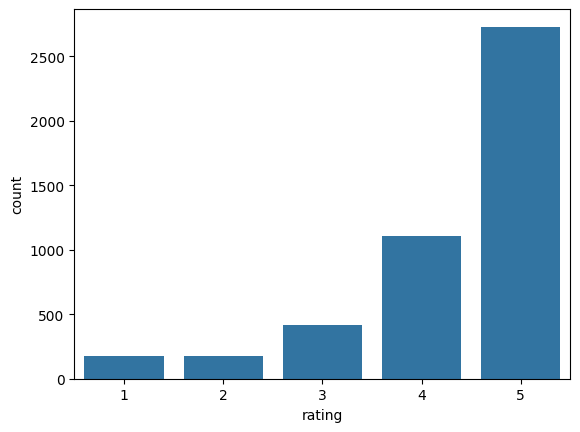

In [58]:
sns.countplot(x='rating', data=df)
plt.show()

We can see that the overall audio market has generally positive feedback on Amazon, but let's take a closer look at Beats Products v Competitors.

Beats Mean Rating: 4.20
Competitor Mean Rating: 4.32


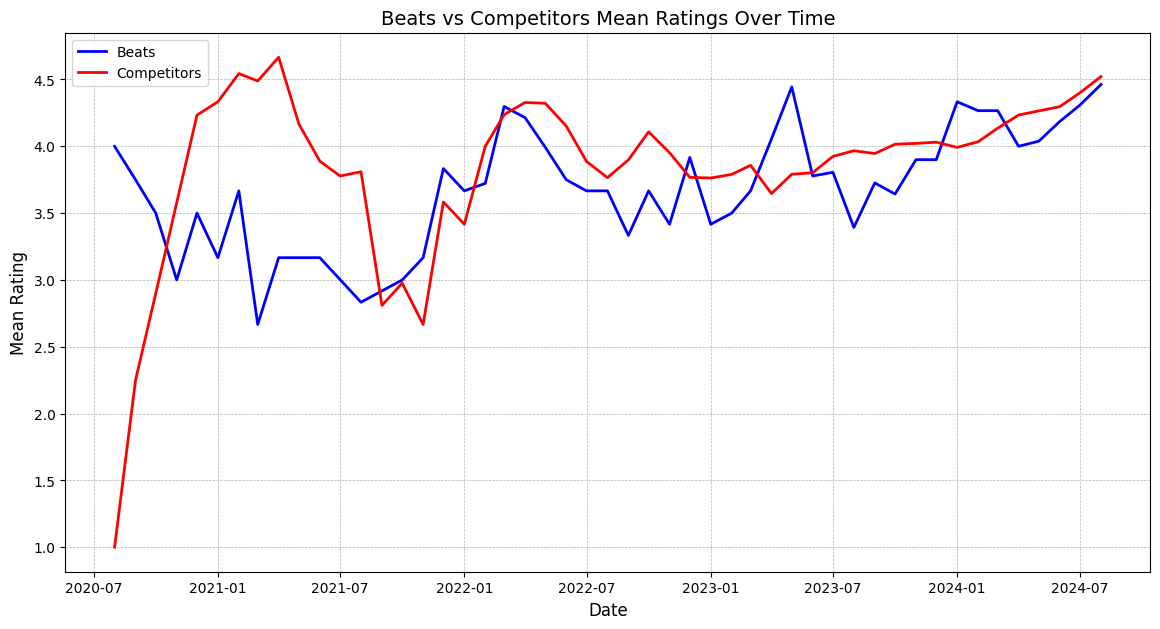

In [62]:
# Filter the DataFrame for Beats and Competitor reviews
beats_reviews = df[df['product_name'].str.contains('Beats')]
competitor_reviews = df[~df['product_name'].str.contains('Beats')]

# Calculate mean ratings
beats_mean = beats_reviews['rating'].mean()
competitor_mean = competitor_reviews['rating'].mean()

print(f"Beats Mean Rating: {beats_mean:.2f}")
print(f"Competitor Mean Rating: {competitor_mean:.2f}")

# Find the overlapping date range
start_date = max(beats_reviews['timestamp'].min(), competitor_reviews['timestamp'].min())
end_date = min(beats_reviews['timestamp'].max(), competitor_reviews['timestamp'].max())

# Filter both datasets to only include data within the overlapping date range
beats_reviews = beats_reviews[(beats_reviews['timestamp'] >= start_date) & (beats_reviews['timestamp'] <= end_date)]
competitor_reviews = competitor_reviews[(competitor_reviews['timestamp'] >= start_date) & (competitor_reviews['timestamp'] <= end_date)]

# Group by time period (e.g., month) and calculate the mean rating for Beats and Competitors
beats_ratings_over_time = beats_reviews.groupby(beats_reviews['timestamp'].dt.to_period('M'))['rating'].mean()
competitor_ratings_over_time = competitor_reviews.groupby(competitor_reviews['timestamp'].dt.to_period('M'))['rating'].mean()

# Apply a rolling average to smooth out the data
beats_ratings_smooth = beats_ratings_over_time.rolling(window=3, min_periods=1).mean()
competitor_ratings_smooth = competitor_ratings_over_time.rolling(window=3, min_periods=1).mean()

# Plotting the ratings over time with improvements
plt.figure(figsize=(14, 7))
plt.plot(beats_ratings_smooth.index.to_timestamp(), beats_ratings_smooth, label='Beats', color='blue', linewidth=2, markersize=6)
plt.plot(competitor_ratings_smooth.index.to_timestamp(), competitor_ratings_smooth, label='Competitors', color='red', linewidth=2, markersize=6)

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Rating', fontsize=12)
plt.title('Beats vs Competitors Mean Ratings Over Time', fontsize=14)
plt.legend()

# Show the plot
plt.show()

The graph shows that while Beats slightly underperformed compared to the broader market, it remained competitive, especially from 2021 to 2022. This improvement can be attributed to several key factors:
<br /><br />
**Product Enhancements:**


Beats Studio Buds (2021) introduced active noise cancellation and seamless integration with Apple devices, appealing to both iOS and Android users.
H1 Chip Integration in products like Beats Fit Pro offered faster connectivity and "Hey Siri" functionality, enhancing user experience.
<br /><br />
**Apple Ecosystem:**


Spatial Audio and Find My Network support made Beats products more attractive to Apple users, offering immersive sound and added device security.
<br /><br />
**Strategic Collaborations:**


High-profile partnerships, such as with Kim Kardashian, kept Beats in the public eye and attracted new customers.
These factors combined to help Beats maintain a strong position in the market during this period.

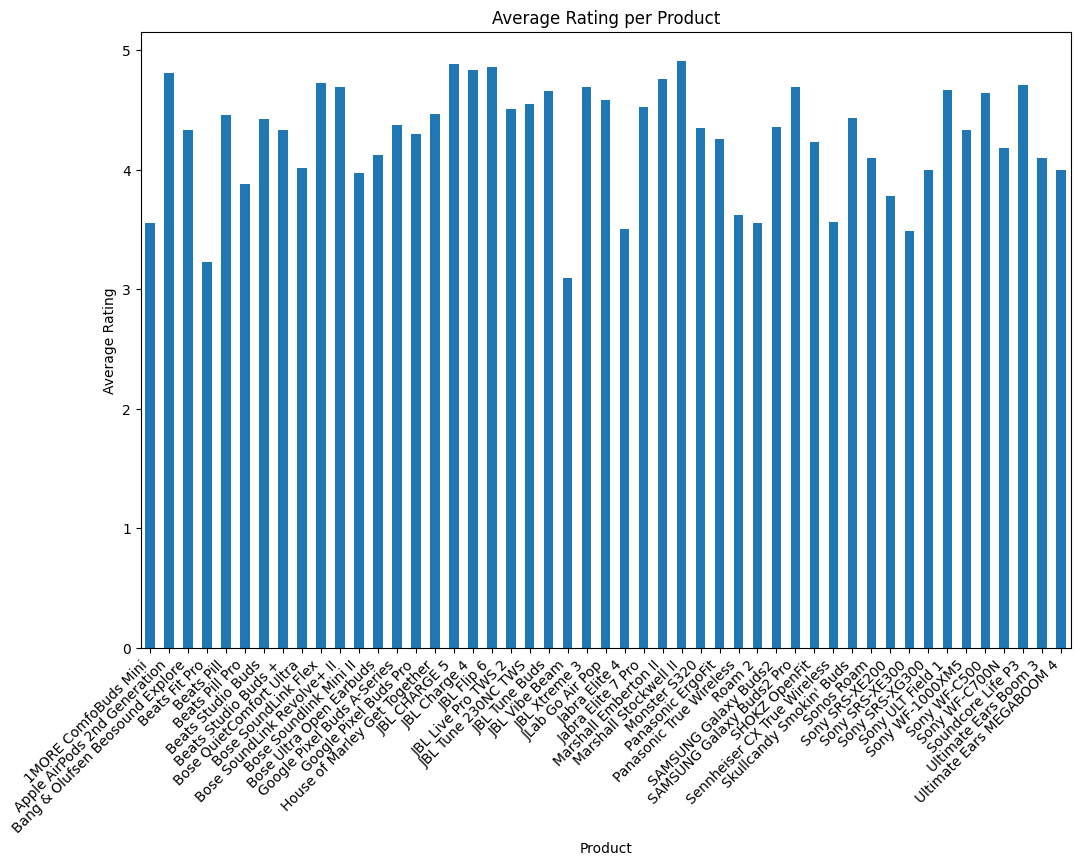

In [63]:
# Average Ratings / Product
avg_ratings = df.groupby('product_name')['rating'].mean()
avg_ratings.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Product')
plt.ylabel('Average Rating')
plt.title('Average Rating per Product')
plt.xticks(rotation=45, ha="right")
plt.show()

Further checking over other metrics, we can see that the reviews scraped are almost equal apart from few products.

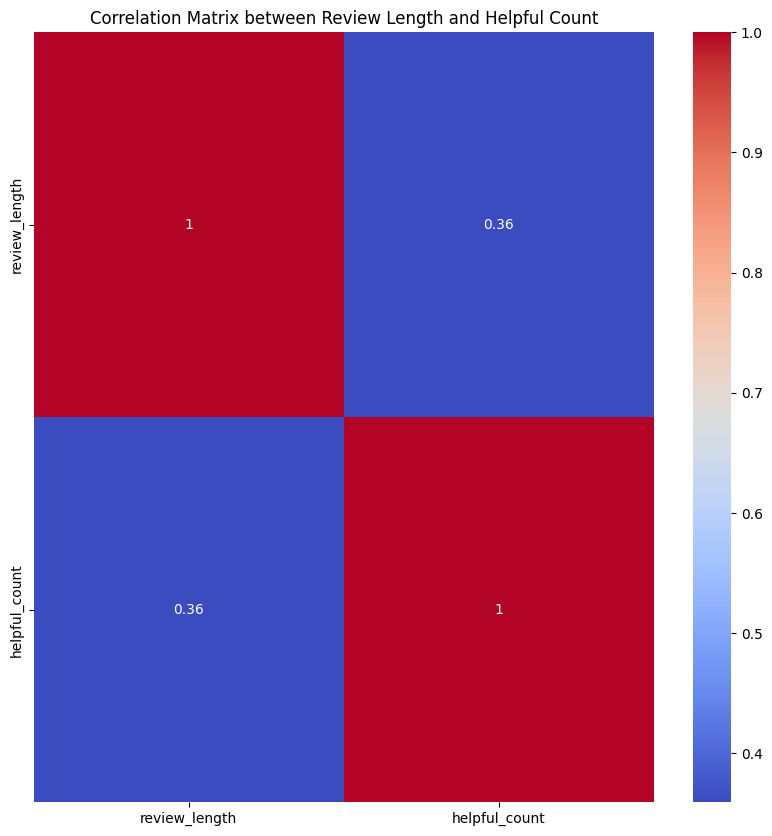

In [66]:
# Get Review Length
df['review_length'] = df['content'].apply(lambda x: len(str(x)))

# Compute Correlation Matrix between Review Length and Helpful Count
corr_matrix = df[['review_length', 'helpful_count']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Review Length and Helpful Count')
plt.show()

Lastly, I have displayed a correlation matrix showing the only two variables that have slight correlation: **review_length** and **helpful_count**. We can see with this that longer responses tend to correlate more with a skewed review (1 or 5 star).

##Descriptive Statistis
**Key Findings:**
* Historically, when Beats has introduced new products/features, a spike in customer reviews has been present.
* The Data contains no missing values; however, only three numerical columns could be compared.
* Only two variables have a relatively strong correlation in our dataset shown in the correlation matrix.
* There are roughly 5000 Reviews scraped from Amazon containing competitors and Beats Products.
* Beats is competitive reviews-wise with the overall market and has been for multiple years (however is much closer to the competition now).
* Most reviews collected are five-stars, representing overall customer satisfaction in the audio market.

#**Step Three: Sentiment Analysis**
In this section, we will use various Python libraries (TextBlob, NLTK) to find overall sentiment of Beats Products & Competitors using our reviews in the Dataframe.

In [67]:
# Perform Sentiment Analysis on Entire Datset
from textblob import TextBlob

review_text = df['content']
sentiment_scores = []
subjectivity_scores = []

for review in review_text:
    blob = TextBlob(review)
    sentiment_scores.append(blob.sentiment.polarity)
    subjectivity_scores.append(blob.sentiment.subjectivity)

sentiment_scores = np.array(sentiment_scores)
subjectivity_scores = np.array(subjectivity_scores)
print("Overall Sentiment for entire Dataset: ", np.mean(sentiment_scores))
print("Overall Subjectivity for entire Dataset: ", np.mean(subjectivity_scores))

Overall Sentiment for entire Dataset:  0.2716074995816015
Overall Subjectivity for entire Dataset:  0.5243644831536504


**From the scores above, we can break each one down:**

* **Overall Sentiment For Entire Dataset:**

This value indicates that, on average, the reviews in the dataset have a positive sentiment. The value is closer to +1 than to -1, though its not very high, suggesting that while the reviews tend to be
positive, they are not overwhelmingly so.

<br />

* **Overall Subjectivity for the Entire Dataset:**


This value suggests that the reviews are slightly more subjective than objective. A subjectivity score above 0.5 indicates that the reviews tend to express personal opinions or feelings rather than being purely factual.

In [68]:
# Perform Sentiment Analysis for Beats Products Only
beats_reviews = df[df['product_name'].str.contains('Beats', case=False, na=False)]
review_text_beats = beats_reviews['content']
sentiment_scores_beats = []
subjectivity_scores_beats = []

for review in review_text_beats:
    blob = TextBlob(review)
    sentiment_scores_beats.append(blob.sentiment.polarity)
    subjectivity_scores_beats.append(blob.sentiment.subjectivity)

sentiment_scores_beats = np.array(sentiment_scores_beats)
subjectivity_scores_beats = np.array(subjectivity_scores_beats)
print("Overall Sentiment for Beats: ", np.mean(sentiment_scores_beats))
print("Overall Subjectivity for Beats: ", np.mean(subjectivity_scores_beats))

Overall Sentiment for Beats:  0.25634708278432133
Overall Subjectivity for Beats:  0.5256438009843449


**From the scores above, we can break each one down:**

* **Overall Sentiment for Beats Products:**

This value indicates that, on average, the reviews for Beats products in the dataset have a positive sentiment. The value is closer to +1 than to -1, though it’s not very high, suggesting that while the reviews tend to be positive, they are not overwhelmingly so. This sentiment is slightly lower than the overall sentiment for non-Beats products, indicating a consistent but mild positivity across different brands.

<br />

* **Overall Subjectivity for Beats Products:**

This value suggests that the reviews for Beats products are slightly more subjective than objective. A subjectivity score above 0.5 indicates that the reviews often express personal opinions or feelings rather than being purely factual. The subjectivity score for Beats products is almost identical to that of non-Beats products, suggesting that the nature of customer feedback is consistent in terms of subjectivity across different product categories.

In [69]:
# Perform Sentiment Analysis on Non-Beats Products
non_beats_reviews = df[~df['product_name'].str.contains('Beats', case=False, na=False)]
review_text_non_beats = non_beats_reviews['content']
sentiment_scores_non_beats = []
subjectivity_scores_non_beats = []

for review in review_text_non_beats:
    blob = TextBlob(review)
    sentiment_scores_non_beats.append(blob.sentiment.polarity)
    subjectivity_scores_non_beats.append(blob.sentiment.subjectivity)

sentiment_scores_non_beats = np.array(sentiment_scores_non_beats)
subjectivity_scores_non_beats = np.array(subjectivity_scores_non_beats)
print("Overall Sentiment for Non-Beats: ", np.mean(sentiment_scores_non_beats))
print("Overall Subjectivity for Non-Beats: ", np.mean(subjectivity_scores_beats))

Overall Sentiment for Non-Beats:  0.2730372587454833
Overall Subjectivity for Non-Beats:  0.5256438009843449


**From the scores above, we can break each one down:**

* **Overall Sentiment for Non-Beats Products:**

This value indicates that, on average, the reviews for non-Beats products in the dataset have a positive sentiment. The value is closer to +1 than to -1, though it’s not very high, suggesting that while the reviews tend to be positive, they are not overwhelmingly so. This aligns with the overall sentiment observed for the entire dataset, showing a consistent mild positivity in the reviews.

<br />

* **Overall Subjectivity for Non-Beats Products:**

This value suggests that the reviews for non-Beats products are slightly more subjective than objective. A subjectivity score above 0.5 indicates that the reviews often express personal opinions or feelings rather than being purely factual. The subjectivity score for non-Beats products is similar to the overall dataset, indicating that the nature of the reviews (leaning towards subjectivity) is consistent across different product categories.

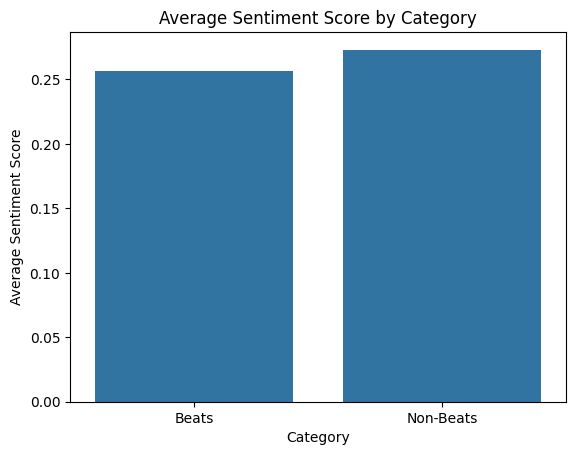

In [74]:
# Visualize Sentiment Scores
sns.barplot(x=['Beats', 'Non-Beats'], y=[np.mean(sentiment_scores_beats), np.mean(sentiment_scores_non_beats)])
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Category')
plt.show()

Similar to the statistics described in graph two, we can see that the Consumer Sentiment is very similar (slightly under) that of the Competing Market based solely on reviews text.

Based on the analysis, the headphone/earbuds/speaker market sentiment is generally positive, with over 80% of all reviews rating the products 4 stars or higher. This indicates strong customer satisfaction across the board.

Further sentiment analysis of review content supports this, revealing that the overall sentiment is fairly positive for the market as a whole. However, Beats By Dre products score slightly below their competitors in terms of overall sentiment.

While Beats By Dre maintains a positive sentiment, this slight underperformance suggests there may be specific areas where the brand could improve to better meet or exceed customer expectations. Further analysis could focus on identifying these areas by examining negative reviews, common themes, or specific aspects of the product experience where competitors are excelling. This targeted approach could provide actionable insights to help Beats By Dre enhance customer satisfaction and potentially outperform the market.


#**Step Four: AI-Generated Insights**
In this section, we will explain how Gemini AI was used to extract insights. We will first examine the code used.



```Python
import google.generativeai as genai

def analyze_reviews(review, api, prompt):
  genai.configure(api_key = api)

  model = genai.GenerativeModel(
      model_name = "gemini-1.5-flash",
      generation_config = {
          "temperature": 0.7,
          "top_k": 64,
          "top_p": 0.95,
          "max_output_tokens": 1024,
          "response_mime_type": "text/plain"
      },
  )

  chat_session = model.start_chat(history = [])
  p = prompt + "\n\n".join([str(item) for item in review])
  response = chat_session.send_message(p)

  return response.text

# Select Beats Reviews (reviews that contain the word beats)
df['product_name'] = df['product_name'].fillna('')

beats_reviews = df[df['product_name'].str.contains('beats', case=False)]
competitor_reviews = df[~df['product_name'].str.contains('beats', case=False)]

reviews = pd.concat([beats_reviews['content'], competitor_reviews['content']])

API_KEY = 'API_KEY'
print("Enter Prompt: ")
text = input()
print("\n\n")

insights = analyze_reviews(reviews, API_KEY, text)
print(insights)
```

Based on the script above, Gemini produced the below results:

##**PROMPT ONE:**
### **Beats By Dre Headphones: Pros & Cons**
**PROMPT:** *What are the top three biggest complaints and pros of Beats By Dre Headphones. Also, where are competitors struggling/winning?*

**Pros:**
1. **Sound Quality:** Powerful bass, ideal for bass-heavy genres.
2. **Build Quality:** Durable and suitable for active lifestyles.
3. **Style & Design:** Trendy, with various colors and finishes.

**Cons:**
1. **Price:** Higher cost, often seen as not fully justified.
2. **Sound Quality (for some):** Too bass-heavy for audiophiles.
3. **Connectivity:** Issues reported, especially with Android devices.

**Competitors:**

**Struggling:**
- Brands with unbalanced sound profiles, inconsistent quality, or limited features.

**Winning:**
- Brands offering superior, balanced sound, advanced features (e.g., noise cancellation), and better value.

##**PROMPT TWO:**
### **Beats Customer Trends and Attraction Strategies**
**PROMPT: ** *Are customers from Beats moving to other products or vice versa? Also, how could Beats attract more customers?*

It seems like Beats has a loyal following, particularly among those who value:

* **Physical buttons:** This is a key differentiator for Beats, as many other brands have moved towards touch controls.
* **Bassy sound:** Beats is known for its emphasis on powerful bass, which appeals to users who enjoy a more "punchy" listening experience.
* **Apple ecosystem integration:**  Beats earbuds pair seamlessly with iPhones and other Apple devices, offering a convenient experience for Apple users.

However, some aspects could be improved to attract a wider audience:

* **Comfort:** The Beats Fit Pro's wingtip design is secure but can be uncomfortable for some. Offering more flexible fit options (like the Galaxy Buds Live) could appeal to a broader range of users.
* **Noise cancellation:** While Beats' noise cancellation is solid, it's not considered top-tier like Bose. Improving ANC to match the best on the market would be a significant advantage.
* **Price:** Beats earbuds are priced competitively, but some users might find them too expensive compared to other options with similar features. Offering more affordable models could attract budget-conscious consumers.

**Here are some specific ways Beats could attract more customers:**

* **Expand color options:** Offer more subdued and neutral colorways for those who prefer a less noticeable earbud.
* **Introduce a "Pro" version of the Studio Buds:** This could offer more advanced features like wireless charging, improved ANC, and a more durable case.
* **Develop a more robust app:**  The current Beats app is lackluster. Adding features like an equalizer, more customization options, and a better Find My Earbuds function would enhance the user experience.
* **Explore new form factors:**  Beats could introduce earbuds with different shapes and designs to cater to a wider range of ear shapes and preferences.
* **Partner with popular artists and influencers:** This can help to create buzz and reach a wider audience, especially among younger consumers.
* **Offer more affordable models:**  Introducing a line of budget-friendly earbuds with fewer features could attract price-sensitive customers.


##**SUMMARY/INTERPRETATION:**
The insights generated by Gemini AI highlight both the strong appeal and the areas for improvement for Beats By Dre.

Relevance to Beats By Dre:
The identified pros like sound quality and design are critical to maintaining the brands premium image, especially among users who prioritize style and a bass-heavy sound.

However, the highlighted cons—such as price and sound profile preferences—indicate opportunities for Beats to expand its market by addressing these concerns, potentially through introducing more balanced audio options or more budget-friendly products.

The competitive analysis underscores the need for Beats to innovate, particularly in advanced features like noise cancellation and app functionality, to stay ahead in the increasingly competitive audio market.

In summary, these AI-generated insights provide actionable strategies for Beats By Dre to refine its offerings, better meet consumer needs, and strengthen its position against competitors.

#**Step Five: Comparitave Analysis**
In this section, we will further analyze Beats competition and their market positioning.

###**Main Competitor Overview:**

- **Bose:**
  - Target Audience: Audiophiles and professionals seeking top-tier noise cancellation.
  - Product Range: High-end over-ear and in-ear headphones, with a focus on noise-canceling technology.
  - USP: Industry-leading noise cancellation and balanced sound profile.

- **Sony:**
  - Target Audience: Tech-savvy consumers and audiophiles.
  - Product Range: Wide range of headphones, including premium noise-canceling models and affordable options.
  - USP: Strong focus on innovative features like adaptive sound control and high-resolution audio.

- **Sennheiser:**
  - Target Audience: Audiophiles and professional sound engineers.
  - Product Range: Audiophile-grade over-ear headphones, professional monitoring headphones, and wireless earbuds.
  - USP: Renowned for delivering exceptional sound quality with a balanced audio signature.

###**SWOT Analysis of Beats By Dre**
- **Strengths:**
  - Strong brand recognition and customer loyalty.
  - High-quality build and stylish designs.
  - Powerful bass, appealing to certain music genres.

- **Weaknesses:**
  - High price point may deter budget-conscious consumers.
  - Bass-heavy sound profile may not appeal to audiophiles.
  - Occasional connectivity issues, especially with non-Apple devices.

- **Opportunities:**
  - Expand product line to include more affordable options.
  - Improve sound profile to cater to a broader audience.
  - Leverage the Apple ecosystem to introduce new features and integrations.

- **Threats:**
  - Increasing competition from brands like Sony and Bose with superior sound quality and noise cancellation.
  - Changing consumer preferences towards more balanced sound profiles.
  - Economic downturns affecting consumer spending on premium products.


#**Step Six: Strategic Recommendations & Conclusion**

## **Strategic Recommendations**
### **Product Improvements:**
- To stay competitive, Beats by Dre should consider introducing more balanced sound profiles, improving connectivity with non-Apple devices, and expanding the range of color and design options. Furthermore, Beats By Dre should experiment with budget options our findings have shown.

### **Marketing Strategies:**
- Marketing efforts could focus on partnerships with influencers, emphasizing the brands integration with the Apple ecosystem, and highlighting improvements in areas previously seen as weaknesses, such as connectivity and price.

## **Future Research**
### **Areas for Further Study:**
- Future research could include a deeper analysis of user demographics to tailor marketing strategies more effectively, exploring new product categories, and conducting longitudinal studies to track sentiment changes over time.

## **Conclusion**
- This project highlighted the strengths and weaknesses of Beats by Dre in a competitive market. While the brand has a strong following, there are clear opportunities to enhance product offerings and marketing strategies to maintain and grow its market share.

#**References:**
* https://www.macrumors.com/guide/beats/
* https://www.beatsbydre.com/
* (*Previous Notebooks* )
* https://www.beatsbydre.com/company/aboutus
* https://textblob.readthedocs.io/en/dev/